In [42]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [43]:
#Path to our csv files
stock_data = Path("Resources/GME_stock.csv")
reddit_data = Path("Resources/submissions_reddit.csv")

#Reading csv files into pandas
reddit_df = pd.read_csv(reddit_data)
stock_df = pd.read_csv(stock_data)
reddit_df

/var/folders/65/g3fq_xgj383gkz0z__dwst4w0000gn/T/ipykernel_12281/873191435.py:6: DtypeWarning: Columns (5,6,7,8,9,10,11,12,15,16,17,18,19,20,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_df = pd.read_csv(reddit_data)


,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink,Unnamed: 24,Unnamed: 25
0,ko124i,[deleted],1/1/21 0:02,2/2/21 21:52,1/1/70 0:00,0,0,0,1,1,...,34,0,1,14.0,0.0,[deleted],default,https://redd.it/ko124i,NaN,NaN
1,ko12uq,[deleted],1/1/21 0:03,2/2/21 21:52,1/1/70 0:00,0,0,0,1,1,...,2,0,0,0.0,0.0,[deleted],default,https://redd.it/ko12uq,NaN,NaN
2,ko13df,[deleted],1/1/21 0:04,2/2/21 21:52,1/1/70 0:00,0,0,0,1,1,...,13,0,0,7.0,0.0,[deleted],default,https://redd.it/ko13df,NaN,NaN
3,ko17yf,shirotimatim,1/1/21 0:11,2/2/21 21:52,1/1/70 0:00,0,0,0,0,0,...,183,0,0,26.0,0.0,NaN,https://b.thumbs.redditmedia.com/LmWdNB0W1qHT0...,https://redd.it/ko17yf,NaN,NaN
4,ko1a4i,WSBVoteBot,1/1/21 0:15,2/2/21 21:52,1/1/70 0:00,0,0,0,0,0,...,0,0,0,19.0,0.0,Every time a new submission is posted to walls...,self,https://redd.it/ko1a4i,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775966,rt6e7q,[deleted],12/31/21 23:44,1/1/22 3:56,1/1/70 0:00,0,0,0,1,0,...,1,0,0,1,0,[removed],default,https://redd.it/rt6e7q,NaN,NaN
775967,rt6frk,Hychro617,12/31/21 23:46,1/1/22 3:56,1/1/70 0:00,0,0,0,1,0,...,1,0,0,1,0,[removed],self,https://redd.it/rt6frk,NaN,NaN
775968,rt6kgr,Lambaline,12/31/21 23:53,1/1/22 3:56,1/1/70 0:00,0,0,0,1,0,...,2,0,0,3,0,NaN,https://b.thumbs.redditmedia.com/TtUVXN1XpoXXu...,https://redd.it/rt6kgr,NaN,NaN
775969,rt6kvg,[deleted],12/31/21 23:54,1/1/22 3:56,1/1/70 0:00,0,0,0,1,1,...,1,0,0,1,0,[deleted],default,https://redd.it/rt6kvg,NaN,NaN


In [44]:
#remove rows 2207-2225
reddit_clean_df = reddit_df
for x in range(2207,2225):    
    reddit_clean_df = reddit_clean_df.drop(axis = 0,index = x)
#verify rows were deleted    
reddit_clean_df.shape


(775953, 26)

In [45]:
#ID, created, deleted, title, link_flair,upvote_ratio, score, total_awards, num_comments, num_crosspost
reddit_clean_df = reddit_clean_df[["id", "created", "deleted", "title", "link_flair_text","upvote_ratio"
                                   , "score", "total_awards_received", "num_comments", "num_crossposts"]]
reddit_clean_df

,id,created,deleted,title,link_flair_text,upvote_ratio,score,total_awards_received,num_comments,num_crossposts
0,ko124i,1/1/21 0:02,1,"3k - 170k since March (Also, buy LIT!!)",Gain,1,34,1,14.0,0.0
1,ko12uq,1/1/21 0:03,1,Got out of PLTR calls after learning about IV ...,Gain,1,2,0,0.0,0.0
2,ko13df,1/1/21 0:04,1,Hell of a headline,Meme,0.88,13,0,7.0,0.0
3,ko17yf,1/1/21 0:11,0,"Top popular stocks on WSB too! Also, why they ...",News,0.92,183,0,26.0,0.0
4,ko1a4i,1/1/21 0:15,0,WSBVoteBot Log for Jan 01 2021,NaN,0.5,0,0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...
775966,rt6e7q,12/31/21 23:44,0,Winner or loser? Only time will tell. 2021 end...,Discussion,1,1,0,1,0
775967,rt6frk,12/31/21 23:46,0,Stock Exchange,YOLO,1,1,0,1,0
775968,rt6kgr,12/31/21 23:53,0,Solid first year on the stock market,Loss,1,2,0,3,0
775969,rt6kvg,12/31/21 23:54,1,Fireworks outside Ryan Kagy’s virtual room! Ge...,Discussion,1,1,0,1,0


In [46]:
stock_df

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,1/28/21,265.000000,483.000000,112.250000,193.600006,58815800,193.600006
1,1/27/21,354.829987,380.000000,249.000000,347.510010,93396700,347.510010
2,1/26/21,88.559998,150.000000,80.199997,147.979996,178588000,147.979996
3,1/25/21,96.730003,159.179993,61.130001,76.790001,177874000,76.790001
4,1/22/21,42.590000,76.760002,42.320000,65.010002,196784300,65.010002
...,...,...,...,...,...,...,...
4768,2/20/02,9.600000,9.875000,9.525000,9.875000,1723200,6.648838
4769,2/19/02,9.900000,9.900000,9.375000,9.550000,1852600,6.430017
4770,2/15/02,10.000000,10.025000,9.850000,9.950000,2097400,6.699336
4771,2/14/02,10.175000,10.195000,9.925000,10.000000,2755400,6.733003


In [47]:
#Filter Jan2021 and Jan2020 Stock Prices only
jan_2021_df = stock_df[stock_df['date'].str.contains('2021-01', na = False)].sort_values(by='date')
jan_2020_df = stock_df[stock_df['date'].str.contains('2020-01', na = False)].sort_values(by='date')

jan_2020_df

,date,open_price,high_price,low_price,close_price,volume,adjclose_price


In [48]:
 #Find mean, median, min and max closing price
jan_2021_mean = jan_2021_df['close_price'].mean()
jan_2021_min = jan_2021_df['close_price'].min()
jan_2021_max = jan_2021_df['close_price'].max()
jan_2021_median = jan_2021_df['close_price'].median()

jan_2020_mean = jan_2020_df['close_price'].mean()
jan_2020_min = jan_2020_df['close_price'].min()
jan_2020_max = jan_2020_df['close_price'].max()
jan_2020_median = jan_2020_df['close_price'].median()
#Create a dataframe with those  summary stats

jan_2021_summary_stat = pd.DataFrame.from_dict({"Mean Closing Price in Jan": [jan_2021_mean,jan_2020_mean],
                                                "Median Closing Price in Jan":[jan_2021_median,jan_2020_median],
                                                "Minimum Closing Price in Jan":[jan_2021_min, jan_2020_min],
                                                "Maximum Closing Price in Jan":[jan_2021_max,jan_2020_max]}, orient = 'index')
jan_2021_summary_stat.rename(columns={0:"2021",1:"2020"})


,2021,2020
Mean Closing Price in Jan,NaN,NaN
Median Closing Price in Jan,NaN,NaN
Minimum Closing Price in Jan,NaN,NaN
Maximum Closing Price in Jan,NaN,NaN


In [ ]:
#Plot of the closing price in Jan 2021
plot = plt.plot(jan_2021_df['date'],jan_2021_df['close_price'])
plt.xlabel('date')
plt.ylabel('Closing Price in dollars')
plt.title('Closing price over the month of Jan 2021 (GME)')
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
jan2021_reddit = reddit_clean_df[reddit_clean_df['created'].str.contains('2021-01', na = False)].sort_values(by='created')

/var/folders/65/g3fq_xgj383gkz0z__dwst4w0000gn/T/ipykernel_12281/4028713041.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_df['date'] = pd.to_datetime(stock_df['date'])


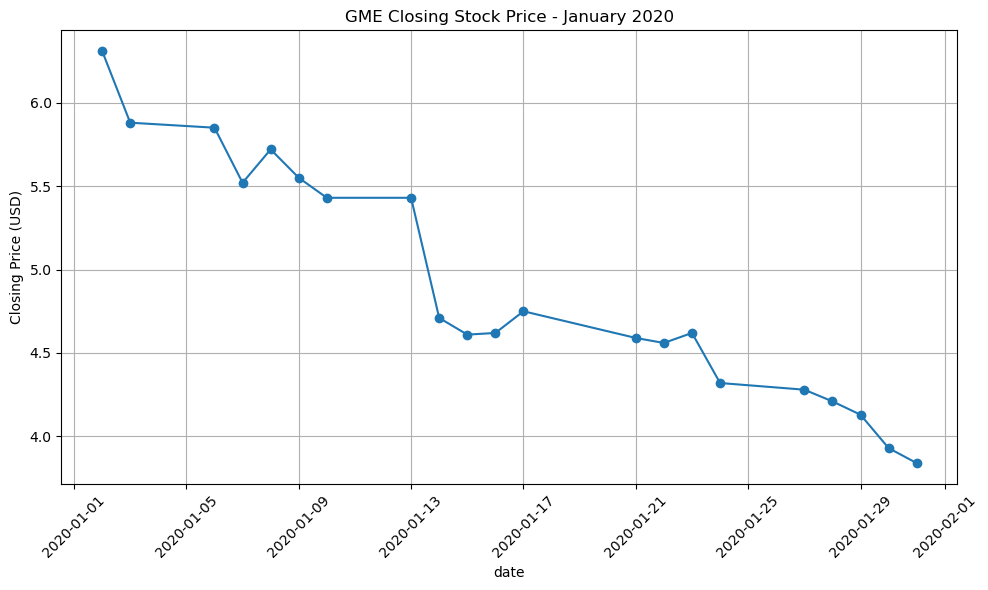

In [49]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

# Filter the DataFrame for January 2020 data
jan_2020_stock = stock_df[(stock_df['date'].dt.year == 2020) & (stock_df['date'].dt.month == 1)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(jan_2020_stock['date'], jan_2020_stock['close_price'], marker='o', linestyle='-')
plt.title('GME Closing Stock Price - January 2020')
plt.xlabel('date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

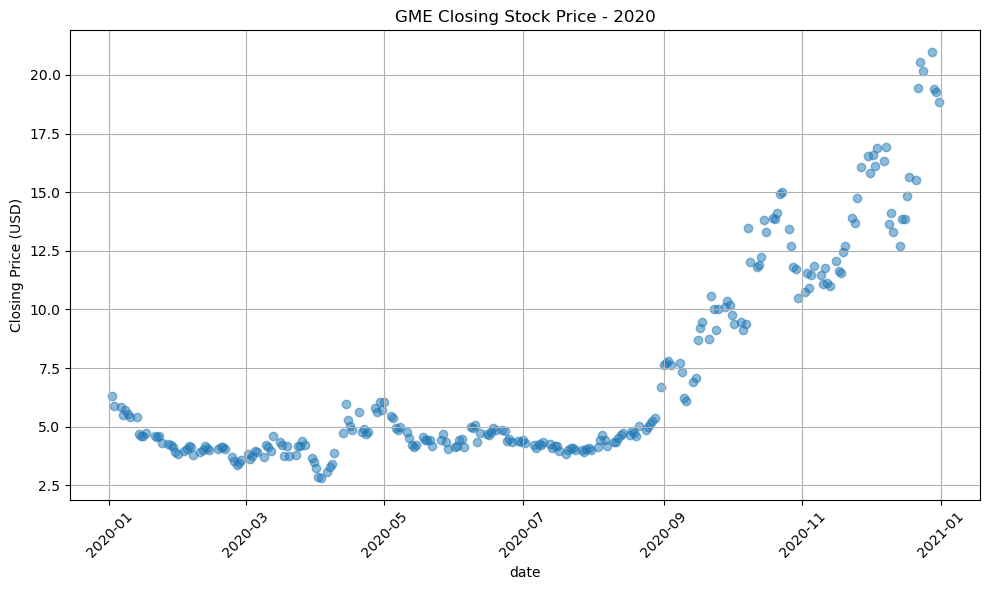

Correlation Coefficient: 0.8000050013170252


In [50]:
# Convert the 'Date' column to datetime format
stock_df['date'] = pd.to_datetime(stock_df['date'])

# Filter the DataFrame for 2020 data
stock_2020 = stock_df[stock_df['date'].dt.year == 2020]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(stock_2020['date'], stock_2020['close_price'], alpha=0.5)
plt.title('GME Closing Stock Price - 2020')
plt.xlabel('date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation_coefficient = stock_2020['date'].corr(stock_2020['close_price'])
print("Correlation Coefficient:", correlation_coefficient)